In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [6]:
df = pd.read_csv("heart.csv")
print("Dataset Loaded Successfully!\n")

Dataset Loaded Successfully!



In [7]:
print("First 5 Rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
display(df.describe())


First 5 Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Summary Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



🔹 Target Value Counts:
target
1    526
0    499
Name: count, dtype: int64


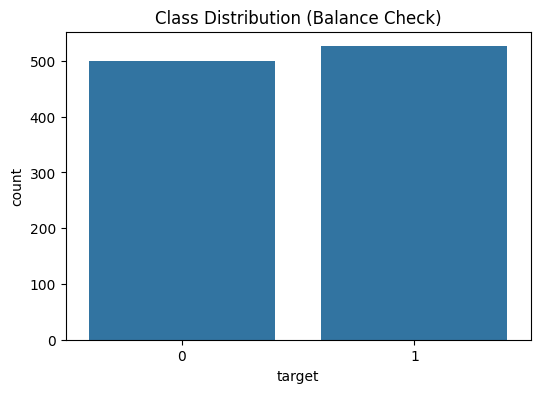

In [8]:
target_col = 'target'  
print("\n🔹 Target Value Counts:")
print(df[target_col].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title("Class Distribution (Balance Check)")
plt.show()

In [9]:
print("\n Missing Values per Column:")
print(df.isnull().sum())

print("\n Duplicate Records:", df.duplicated().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical variables (One-Hot)
df = pd.get_dummies(df, drop_first=True)


 Missing Values per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 Duplicate Records: 723


In [10]:
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])


X = df.drop(columns=[target_col])
y = df[target_col]

In [11]:
print("\n Feature Ranges Before Scaling:")
display(X.describe())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(" Features Scaled Successfully!")


 Feature Ranges Before Scaling:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


 Features Scaled Successfully!


In [12]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=0, stratify=y
)

# Second split: 70% of train for training, 30% for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.3, random_state=0, stratify=y_train_full
)

print(f"\n Train Size: {len(X_train)}")
print(f"Validation Size: {len(X_val)}")
print(f"Test Size: {len(X_test)}")


 Train Size: 168
Validation Size: 73
Test Size: 61


In [13]:

models = {
    "Random Forest": RandomForestClassifier(random_state=0),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0),
    "AdaBoost": AdaBoostClassifier(random_state=0)
}

results = []

for name, model in models.items():
    print(f"\n===== 🔹 {name} =====")
    
   
    model.fit(X_train, y_train)
    


===== 🔹 Random Forest =====

===== 🔹 XGBoost =====


C:\Users\Naveed Sheikh\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [08:08:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Naveed Sheikh\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



===== 🔹 AdaBoost =====


In [15]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
    
   
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
    
   
print(f"Training Accuracy:  {train_acc:.4f}")
print(f"Testing Accuracy:   {test_acc:.4f}")
    
    
results.append([name, train_acc, test_acc])

Training Accuracy:  0.9702
Testing Accuracy:   0.8361


,Model,Train Accuracy,Test Accuracy
0,AdaBoost,0.970238,0.836066


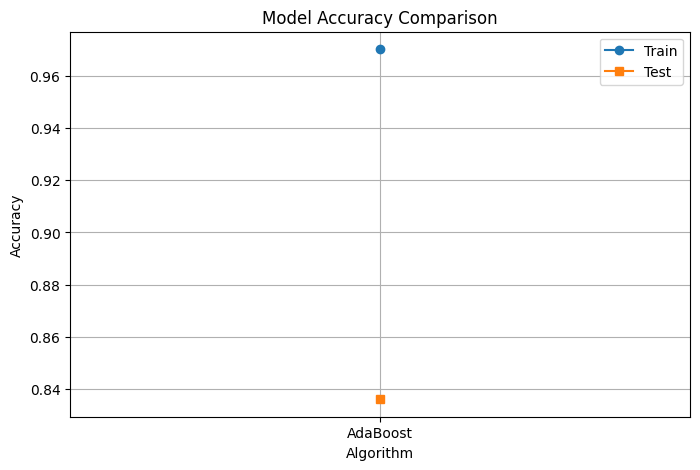

In [16]:
results_df = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy"])
display(results_df)

plt.figure(figsize=(8,5))
plt.plot(results_df["Model"], results_df["Train Accuracy"], marker='o', label="Train")
plt.plot(results_df["Model"], results_df["Test Accuracy"], marker='s', label="Test")
plt.title("Model Accuracy Comparison")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Best Performing Model: AdaBoost

 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



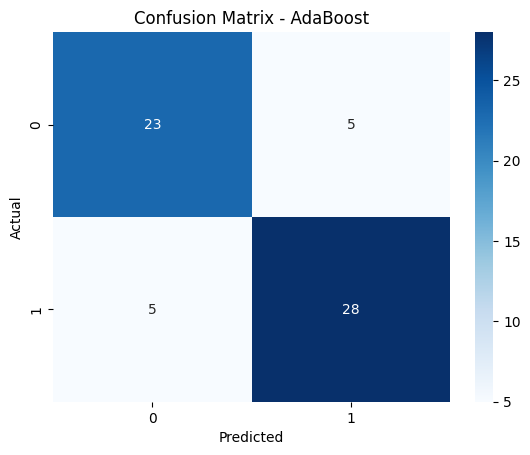

In [17]:
best_model_name = results_df.loc[results_df['Test Accuracy'].idxmax(), 'Model']
print(f"\nBest Performing Model: {best_model_name}")

best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

print("\n Classification Report:")
print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()